In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold
from lightgbm import LGBMClassifier

In [ ]:
# load data

df = pd.read_csv("data_1.csv")
# drop first column, team names now that hayden processed the data
df = df.iloc[:, 1:]
df = df.drop(columns=['HomeTeam', 'AwayTeam'])

# then label encode results
label_encoder = LabelEncoder()
df['FTR'] = label_encoder.fit_transform(df['FTR'])

# then split 2024-2025 season
df_pastSeasons = df[df['Date'] < '2024-07-01']
df_currentSeason = df[df['Date'] >= '2024-07-01']

# then remove dates from both datasets
df_pastSeasons = df_pastSeasons.drop(columns=['Date'])
df_currentSeason = df_currentSeason.drop(columns=['Date'])

#save
df_pastSeasons.to_csv("data_pastSeason.csv", index=False)
df_currentSeason.to_csv("data_currentSeason.csv", index=False)

# training
x_train = df_pastSeasons.drop(columns=['FTR'])
y_train = df_pastSeasons['FTR']
print(np.unique(y_train))

# testing
x_test = df_currentSeason.drop(columns=['FTR'])
y_test = df_currentSeason['FTR']

[0 1 2]


In [ ]:
scaler = MinMaxScaler()
# scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train_scaled, y_train)

y_train_pred = rf_model.predict(x_train_scaled)
y_test_pred = rf_model.predict(x_test_scaled)

f1_train_rf = f1_score(y_train, y_train_pred, average='macro')
accuracy_train_rf = accuracy_score(y_train, y_train_pred)

f1_test_rf = f1_score(y_test, y_test_pred, average='macro')
accuracy_test_rf = accuracy_score(y_test, y_test_pred)

# print("RF F1 Score (Training):", f1_train_rf * 100)
print("RF Accuracy (Training):", accuracy_train_rf * 100)
# print("RF F1 Score (Testing):", f1_test_rf * 100)
print("RF Accuracy (Testing):", accuracy_test_rf * 100)

RF Accuracy (Training): 99.89473684210526
RF Accuracy (Testing): 51.291512915129154


In [ ]:
rf_model = RandomForestClassifier(max_depth=4, criterion='entropy', n_estimators=100)
rf_model.fit(x_train_scaled, y_train)

y_train_pred = rf_model.predict(x_train_scaled)
y_test_pred = rf_model.predict(x_test_scaled)

f1_train_rf = f1_score(y_train, y_train_pred, average='macro')
accuracy_train_rf = accuracy_score(y_train, y_train_pred)

f1_test_rf = f1_score(y_test, y_test_pred, average='macro')
accuracy_test_rf = accuracy_score(y_test, y_test_pred)

# print("RF F1 Score (Training):", f1_train_rf * 100)
print("RF Accuracy (Training):", accuracy_train_rf * 100)
# print("RF F1 Score (Testing):", f1_test_rf * 100)
print("RF Accuracy (Testing):", accuracy_test_rf * 100)

RF Accuracy (Training): 53.94736842105263
RF Accuracy (Testing): 47.23247232472325


In [ ]:
ada_boost_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, criterion='gini'), n_estimators=200)
ada_boost_model.fit(x_train_scaled, y_train)

y_train_pred = ada_boost_model.predict(x_train_scaled)
y_test_pred = ada_boost_model.predict(x_test_scaled)

f1_train_ab = f1_score(y_train, y_train_pred, average='macro')
accuracy_train_ab = accuracy_score(y_train, y_train_pred)

f1_test_ab = f1_score(y_test, y_test_pred, average='macro')
accuracy_test_ab = accuracy_score(y_test, y_test_pred)

# print("AdaBoost F1 Score (Training):", f1_train_ab * 100)
print("AdaBoost Accuracy (Training):", accuracy_train_ab * 100)
# print("AdaBoost F1 Score (Testing):", f1_test_ab * 100)
print("AdaBoost Accuracy (Testing):", accuracy_test_ab * 100)

AdaBoost Accuracy (Training): 53.44736842105263
AdaBoost Accuracy (Testing): 47.601476014760145


In [ ]:
import warnings
warnings.filterwarnings('ignore')
# https://lightgbm.readthedocs.io/en/stable/Parameters.html#learning-control-parameters
lgbm_model = LGBMClassifier(learning_rate=0.1, max_depth=1, n_estimators=200, force_row_wise=True, objective='multiclass', tree_learner='voting') # params dont change much

lgbm_model.fit(x_train_scaled, y_train)

y_train_pred = lgbm_model.predict(x_train_scaled)
y_test_pred = lgbm_model.predict(x_test_scaled)

f1_train_lgbm = f1_score(y_train, y_train_pred, average='macro')
accuracy_train_lgbm = accuracy_score(y_train, y_train_pred)

f1_test_lgbm = f1_score(y_test, y_test_pred, average='macro')
accuracy_test_lgbm = accuracy_score(y_test, y_test_pred)

print("LightGBM Accuracy (Training):", accuracy_train_lgbm * 100)
print("LightGBM Accuracy (Testing):", accuracy_test_lgbm * 100)

[LightGBM] [Info] Total Bins 1209
[LightGBM] [Info] Number of data points in the train set: 3800, number of used features: 34
[LightGBM] [Info] Start training from score -1.147692
[LightGBM] [Info] Start training from score -1.456039
[LightGBM] [Info] Start training from score -0.799678
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

In [ ]:
# XGBoost
# xgb_model = xgb.XGBClassifier()
xgb_model = XGBClassifier(learning_rate=0.1, min_split_loss=1)
xgb_model.fit(x_train_scaled, y_train)

y_train_pred = xgb_model.predict(x_train_scaled)
y_test_pred = xgb_model.predict(x_test_scaled)

f1_train_xgb = f1_score(y_train, y_train_pred, average='macro')
accuracy_train_xbg = accuracy_score(y_train, y_train_pred)

f1_test_ab = f1_score(y_test, y_test_pred, average='macro')
accuracy_test_ab = accuracy_score(y_test, y_test_pred)

# print("AdaBoost F1 Score (Training):", f1_train_ab * 100)
print("AdaBoost Accuracy (Training):", accuracy_train_ab * 100)
# print("AdaBoost F1 Score (Testing):", f1_test_ab * 100)
print("AdaBoost Accuracy (Testing):", accuracy_test_ab * 100)


AdaBoost Accuracy (Training): 53.44736842105263
AdaBoost Accuracy (Testing): 46.494464944649444


In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(x_train_scaled, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

# Predict with the best model
best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(x_train_scaled)
y_test_pred = best_model.predict(x_test_scaled)

# Evaluate
accuracy_train_xgb = accuracy_score(y_train, y_train_pred)
accuracy_test_xgb = accuracy_score(y_test, y_test_pred)

print("XGBoost Accuracy (Training):", accuracy_train_xgb * 100)
print("XGBoost Accuracy (Testing):", accuracy_test_xgb * 100)

#Best Hyperparameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.7}

Fitting 3 folds for each of 243 candidates, totalling 729 fits


KeyboardInterrupt: 

In [ ]:
rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [1],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt', None]  # error with auto
}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search_rf.fit(x_train_scaled, y_train)

print("Best Hyperparameters:", grid_search_rf.best_params_)

# Predictions
best_rf_model = grid_search_rf.best_estimator_
y_train_pred = best_rf_model.predict(x_train_scaled)
y_test_pred = best_rf_model.predict(x_test_scaled)

# Evaluate
accuracy_train_rf = accuracy_score(y_train, y_train_pred)
accuracy_test_rf = accuracy_score(y_test, y_test_pred)

print("Random Forest Accuracy (Training):", accuracy_train_rf * 100)
print("Random Forest Accuracy (Testing):", accuracy_test_rf * 100)

# Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Fitting 3 folds for each of 24 candidates, totalling 72 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
24 fits failed out of a total of 72.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

Best Hyperparameters: {'max_depth': 1, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Accuracy (Training): 52.28947368421053
Random Forest Accuracy (Testing): 44.28044280442804


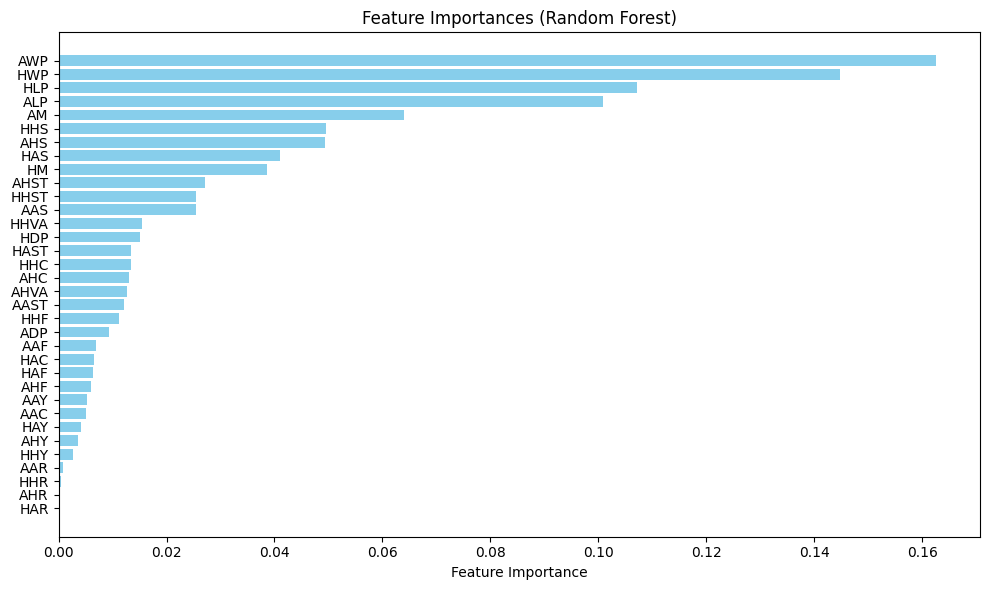

In [ ]:
# Feature importances
feature_importances = rf_model.feature_importances_
sorted_idx = feature_importances.argsort()[::-1]  # Indices of features sorted by importance

# important features sorted
features = x_train.columns
# for i in range(len(features)):  # Display top 10 or less if fewer columns
#     print(f"Feature {x_train.columns[sorted_idx[i]]}: {feature_importances[sorted_idx[i]]}")

plt.figure(figsize=(10, 6))
plt.barh(features[sorted_idx], feature_importances[sorted_idx], align='center', color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importances (Random Forest)')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.tight_layout()
plt.show()


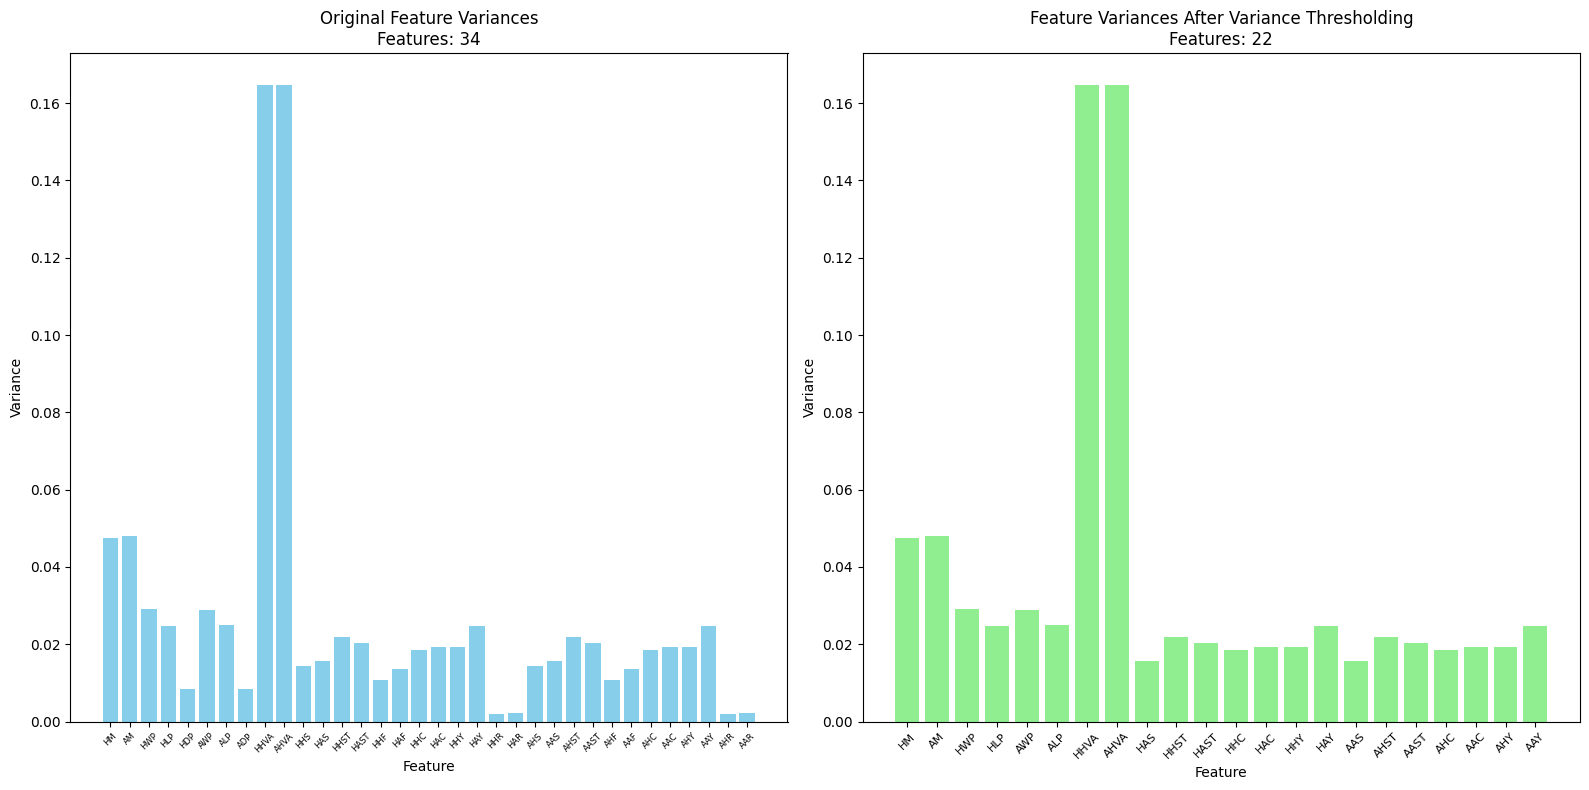

Number of features before variance threshold: 34
Number of features after variance threshold: 22


In [ ]:
threshold = 0.015
selector = VarianceThreshold(threshold)

# Apply the selector to the scaled features
x_train_scaled_selected = selector.fit_transform(x_train_scaled)
x_test_scaled_selected = selector.transform(x_test_scaled)

# original features
variances_train_scaled_original = np.var(x_train_scaled, axis=0)
# selected features
variances_train_scaled_selected = np.var(x_train_scaled_selected, axis=0)

feature_names_scaled = x_train.columns
num_features_before = x_train_scaled.shape[1]
num_features_after = x_train_scaled_selected.shape[1]


plt.figure(figsize=(16, 8))

# original
plt.subplot(1, 2, 1)
plt.bar(feature_names_scaled, variances_train_scaled_original, color='skyblue')
plt.title(f'Original Feature Variances\nFeatures: {num_features_before}')
plt.xlabel('Feature')
plt.ylabel('Variance')
plt.xticks(rotation=45 , fontsize=6)

#selected
plt.subplot(1, 2, 2)
plt.bar(feature_names_scaled[selector.get_support()], variances_train_scaled_selected, color='lightgreen')
plt.title(f'Feature Variances After Variance Thresholding\nFeatures: {num_features_after}')
plt.xlabel('Feature')
plt.ylabel('Variance')
plt.xticks(rotation=45, fontsize=8)

plt.tight_layout()
plt.show()


print(f"Number of features before variance threshold: {num_features_before}")
print(f"Number of features after variance threshold: {num_features_after}")

In [ ]:
# XGBoost after variance threshold
xgb_model = XGBClassifier(learning_rate=0.1, min_split_loss=1, max_depth=1, n_estimators=100)

xgb_model.fit(x_train_scaled_selected, y_train)

y_train_pred = xgb_model.predict(x_train_scaled_selected)
y_test_pred = xgb_model.predict(x_test_scaled_selected)

f1_train_xgb = f1_score(y_train, y_train_pred, average='macro')
accuracy_train_xbg = accuracy_score(y_train, y_train_pred)

f1_test_ab = f1_score(y_test, y_test_pred, average='macro')
accuracy_test_ab = accuracy_score(y_test, y_test_pred)

# print("AdaBoost F1 Score (Training):", f1_train_ab * 100)
print("AdaBoost Accuracy (Training):", accuracy_train_ab * 100)
# print("AdaBoost F1 Score (Testing):", f1_test_ab * 100)
print("AdaBoost Accuracy (Testing):", accuracy_test_ab * 100)

AdaBoost Accuracy (Training): 53.026315789473685
AdaBoost Accuracy (Testing): 51.291512915129154


Not really any better

In [ ]:
rf_model = RandomForestClassifier(max_depth=1, max_features=None, min_samples_leaf=1, min_samples_split=2, criterion='entropy', n_estimators=100, oob_score=True, bootstrap=True)
rf_model.fit(x_train_scaled_selected, y_train)

y_train_pred = rf_model.predict(x_train_scaled_selected)
y_test_pred = rf_model.predict(x_test_scaled_selected)

f1_train_rf = f1_score(y_train, y_train_pred, average='macro')
accuracy_train_rf = accuracy_score(y_train, y_train_pred)

f1_test_rf = f1_score(y_test, y_test_pred, average='macro')
accuracy_test_rf = accuracy_score(y_test, y_test_pred)

# print("RF F1 Score (Training):", f1_train_rf * 100)
print("RF Accuracy (Training):", accuracy_train_rf * 100)
# print("RF F1 Score (Testing):", f1_test_rf * 100)
print("RF Accuracy (Testing):", accuracy_test_rf * 100)

RF Accuracy (Training): 52.34210526315789
RF Accuracy (Testing): 44.28044280442804


Its worse!

In [ ]:
ada_boost_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, max_features=None, min_samples_leaf=1, min_samples_split=2, criterion='entropy'), n_estimators=100)
ada_boost_model.fit(x_train_scaled_selected, y_train)

y_train_pred = ada_boost_model.predict(x_train_scaled_selected)
y_test_pred = ada_boost_model.predict(x_test_scaled_selected)

f1_train_ab = f1_score(y_train, y_train_pred, average='macro')
accuracy_train_ab = accuracy_score(y_train, y_train_pred)

f1_test_ab = f1_score(y_test, y_test_pred, average='macro')
accuracy_test_ab = accuracy_score(y_test, y_test_pred)

# print("AdaBoost F1 Score (Training):", f1_train_ab * 100)
print("AdaBoost Accuracy (Training):", accuracy_train_ab * 100)
# print("AdaBoost F1 Score (Testing):", f1_test_ab * 100)
print("AdaBoost Accuracy (Testing):", accuracy_test_ab * 100)

AdaBoost Accuracy (Training): 53.026315789473685
AdaBoost Accuracy (Testing): 49.07749077490775


Best so far but 49% is BAD

In [ ]:
import warnings
warnings.filterwarnings('ignore')
# https://lightgbm.readthedocs.io/en/stable/Parameters.html#learning-control-parameters
lgbm_model = LGBMClassifier(learning_rate=0.1, max_depth=1, n_estimators=200, force_row_wise=True, objective='multiclass', tree_learner='voting') # params dont change much
lgbm_model.fit(x_train_scaled_selected, y_train)

y_train_pred = lgbm_model.predict(x_train_scaled_selected)
y_test_pred = lgbm_model.predict(x_test_scaled_selected)

f1_train_lgbm = f1_score(y_train, y_train_pred, average='macro')
accuracy_train_lgbm = accuracy_score(y_train, y_train_pred)

f1_test_lgbm = f1_score(y_test, y_test_pred, average='macro')
accuracy_test_lgbm = accuracy_score(y_test, y_test_pred)

print("LightGBM Accuracy (Training):", accuracy_train_lgbm * 100)
print("LightGBM Accuracy (Testing):", accuracy_test_lgbm * 100)

[LightGBM] [Info] Total Bins 813
[LightGBM] [Info] Number of data points in the train set: 3800, number of used features: 22
[LightGBM] [Info] Start training from score -1.147692
[LightGBM] [Info] Start training from score -1.456039
[LightGBM] [Info] Start training from score -0.799678
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

Ensemble

In [ ]:
base_models = [
    ('rf_model', rf_model),
    ('ada_model', ada_boost_model),
    ('xgb_model', xgb_model),
]

# meta_model = RandomForestClassifier(random_state=42)
meta_model = RandomForestClassifier(max_depth=1, max_features=None, min_samples_leaf=1, min_samples_split=2, criterion='entropy', n_estimators=100, oob_score=True, bootstrap=True, random_state=42)
# meta_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, max_features=None, min_samples_leaf=1, min_samples_split=2, criterion='entropy'), n_estimators=100, random_state=42)
# meta_model = XGBClassifier(learning_rate=0.1, min_split_loss=1, max_depth=1, n_estimators=100, random_state=42)
stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

stacked_model.fit(x_train_scaled_selected, y_train)

y_train_pred = stacked_model.predict(x_train_scaled_selected)
y_test_pred = stacked_model.predict(x_test_scaled_selected)

accuracy_train_stacked = accuracy_score(y_train, y_train_pred)
accuracy_test_stacked = accuracy_score(y_test, y_test_pred)

print("Stacked Model Accuracy (Training):", accuracy_train_stacked * 100)
print("Stacked Model Accuracy (Testing):", accuracy_test_stacked * 100)

Stacked Model Accuracy (Training): 52.368421052631575
Stacked Model Accuracy (Testing): 49.44649446494465


In [ ]:
# Soft Voting
base_models = [
    ('rf_model', rf_model),
    ('ada_model', ada_boost_model),
    ('xgb_model', xgb_model),
]

soft_voting_model = VotingClassifier(estimators=base_models, voting='soft')  # using soft voting
soft_voting_model.fit(x_train_scaled_selected, y_train)

y_train_pred = soft_voting_model.predict(x_train_scaled_selected)
y_test_pred = soft_voting_model.predict(x_test_scaled_selected)

accuracy_train_soft= accuracy_score(y_train, y_train_pred)
accuracy_test_soft = accuracy_score(y_test, y_test_pred)

print("Soft Voting Model Accuracy (Training):", accuracy_train_soft * 100)
print("Soft Voting Model Accuracy (Testing):", accuracy_test_soft * 100)

Soft Voting Model Accuracy (Training): 53.23684210526316
Soft Voting Model Accuracy (Testing): 47.601476014760145


In [ ]:
# Soft Voting
base_models = [
    ('rf_model', rf_model),
    ('ada_model', ada_boost_model),
    ('xgb_model', xgb_model),
    # ('meta_model', meta_model),
]

soft_voting_model = VotingClassifier(estimators=base_models, voting='soft')  # using soft voting
soft_voting_model.fit(x_train_scaled_selected, y_train)

y_train_pred = soft_voting_model.predict(x_train_scaled_selected)
y_test_pred = soft_voting_model.predict(x_test_scaled_selected)

accuracy_train_soft = accuracy_score(y_train, y_train_pred)
accuracy_test_soft = accuracy_score(y_test, y_test_pred)

print("Soft Voting Model Accuracy (Training):", accuracy_train_soft * 100)
print("Soft Voting Model Accuracy (Testing):", accuracy_test_soft * 100)

Soft Voting Model Accuracy (Training): 53.21052631578947
Soft Voting Model Accuracy (Testing): 47.23247232472325


In [ ]:
# Hard Voting
base_models = [
    ('rf_model', rf_model),
    ('ada_model', ada_boost_model),
    ('xgb_model', xgb_model),
    # ('meta_model', meta_model),
]

hard_voting_model = VotingClassifier(estimators=base_models, voting='hard')  # using hard voting
hard_voting_model.fit(x_train_scaled_selected, y_train)

y_train_pred = hard_voting_model.predict(x_train_scaled_selected)
y_test_pred = hard_voting_model.predict(x_test_scaled_selected)

accuracy_train_hard = accuracy_score(y_train, y_train_pred)
accuracy_test_hard = accuracy_score(y_test, y_test_pred)

print("Hard Voting Model Accuracy (Training):", accuracy_train_hard * 100)
print("Hard Voting Model Accuracy (Testing):", accuracy_test_hard * 100)

Hard Voting Model Accuracy (Training): 53.21052631578947
Hard Voting Model Accuracy (Testing): 49.44649446494465


In [ ]:
base_models = [
    ('rf_model', rf_model),
    ('ada_model', ada_boost_model),
    ('xgb_model', xgb_model),
    ('hard_voting_model', hard_voting_model),
    ('soft_voting_model', soft_voting_model),
]

# meta_model = RandomForestClassifier(random_state=42)
meta_model = RandomForestClassifier(max_depth=1, max_features=None, min_samples_leaf=1, min_samples_split=2, criterion='entropy', n_estimators=100, oob_score=True, bootstrap=True, random_state=42)
# meta_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, max_features=None, min_samples_leaf=1, min_samples_split=2, criterion='entropy'), n_estimators=100, random_state=42)
# meta_model = XGBClassifier(learning_rate=0.1, min_split_loss=1, max_depth=1, n_estimators=100, random_state=42)
stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

stacked_model.fit(x_train_scaled_selected, y_train)

y_train_pred = stacked_model.predict(x_train_scaled_selected)
y_test_pred = stacked_model.predict(x_test_scaled_selected)

accuracy_train_stacked = accuracy_score(y_train, y_train_pred)
accuracy_test_stacked = accuracy_score(y_test, y_test_pred)

print("Stacked Model Accuracy (Training):", accuracy_train_stacked * 100)
print("Stacked Model Accuracy (Testing):", accuracy_test_stacked * 100)

Stacked Model Accuracy (Training): 52.39473684210526
Stacked Model Accuracy (Testing): 49.44649446494465
